## Observations and Insights

### The bar graphs display capumulin is the best drug to treat tumors in mice. 
### According to the scatter plot for the campulin data for a mouse from the combined_data. 
### It showed a positive relationship in the reduction of mouse tumor over a period of time. 
### Another positive relationship displayed in the scatter plot was the weight of the mice and the tumor volume for campulin. 
### This relationship was backed by the high and postive correlation and a line of best fit. 

## Dependencies and starter code

In [39]:
%matplotlib inline

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results , how='left', on='Mouse ID')
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = pd.DataFrame({"Tumor Volume (mm3) means": combined_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'],
                                    "Tumor Volume (mm3) medians": combined_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)'],
                                    "Tumor Volume (mm3) variances": combined_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)'],
                                    "Tumor Volume (mm3) sds": combined_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)'],
                                    "Tumor Volume (mm3) sems": combined_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
                                   
                                  })
summary_statistics.head(9)                                  

,Tumor Volume (mm3) means,Tumor Volume (mm3) medians,Tumor Volume (mm3) variances,Tumor Volume (mm3) sds,Tumor Volume (mm3) sems
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0.5, 1.0, 'Data Points For Each Treatment Regimen')

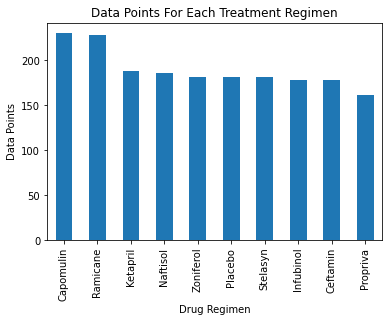

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_count = combined_data['Drug Regimen'].value_counts().plot(kind = "bar")
plt.xlabel("Drug Regimen") 
plt.ylabel("Data Points") 
plt.title("Data Points For Each Treatment Regimen")

In [4]:
drug_regimen = combined_data['Drug Regimen'].value_counts().index
drug_regimen

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

Text(0.5, 1.0, 'Data Points For Each Treatment Regimen')

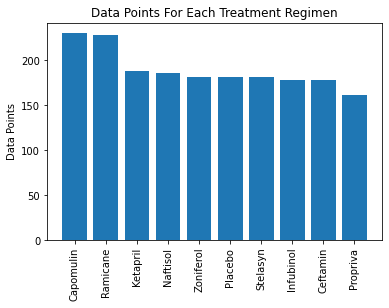

In [72]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimen_count = combined_data['Drug Regimen'].value_counts()
drug_regimen = combined_data['Drug Regimen'].value_counts().index
plt.bar(drug_regimen,drug_regimen_count)
plt.xticks(rotation=90)
plt.ylabel("Data Points") 
plt.title("Data Points For Each Treatment Regimen")

## Pie plots

Text(0.5, 1.0, 'Males VS Female Mice in the sample')

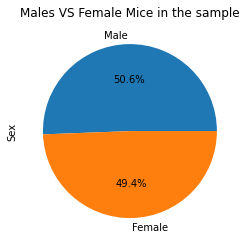

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
distribution_sex = combined_data['Sex'].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.title("Males VS Female Mice in the sample")

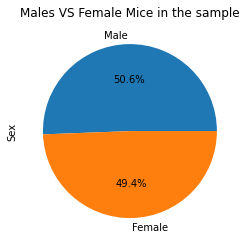

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
distribution_sex_count = combined_data['Sex'].value_counts()
distribution_sex = combined_data['Sex'].value_counts().index
plt.pie(distribution_sex_count,labels=distribution_sex, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.title("Males VS Female Mice in the sample")
plt.show()

## Quartiles, outliers and boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Group the data, then organize it according to the max time point. 
tumor_volume = combined_data.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
max_tumor_volume = tumor_volume.loc[tumor_volume["Timepoint"]== 45].reset_index()

# Select capomulin from the data set 
capomulin = max_tumor_volume.loc[max_tumor_volume["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']

# Select ramicane from the data set 
ramicane = max_tumor_volume.loc[max_tumor_volume["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']

# Select infubinol from the data set 
infubinol = max_tumor_volume.loc[max_tumor_volume["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']

# Select ceftamin from the data set 
ceftamin = max_tumor_volume.loc[max_tumor_volume["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

In [81]:
# Capomulin Quartiles
quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of capomulin is: {lowerq}")
print(f"The upper quartile of capomulin is: {upperq}")
print(f"The interquartile range of capomulin is: {iqr}")
print(f"The the median of capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of capomulin is: 32.37735684
The upper quartile of capomulin is: 40.1592203
The interquartile range of capomulin is: 7.781863460000004
The the median of capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [10]:
# Ramicane Quartiles
quartiles = ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ramicane is: {lowerq}")
print(f"The upper quartile of ramicane is: {upperq}")
print(f"The interquartile range of ramicane is: {iqr}")
print(f"The the median of ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ramicane is: 30.981175224999998
The upper quartile of ramicane is: 38.508305307499995
The interquartile range of ramicane is: 7.527130082499998
The the median of ramicane is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [11]:
# Infubinol Quartiles
quartiles = infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of infubinol is: {lowerq}")
print(f"The upper quartile of infubinol is: {upperq}")
print(f"The interquartile range of infubinol is: {iqr}")
print(f"The the median of infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of infubinol is: 62.75445141
The upper quartile of infubinol is: 67.68556862
The interquartile range of infubinol is: 4.9311172099999965
The the median of infubinol is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [12]:
# Ceftamin Quartiles
quartiles = ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ceftamin is: {lowerq}")
print(f"The upper quartile of ceftamin is: {upperq}")
print(f"The interquartile range of ceftamin is: {iqr}")
print(f"The the median of ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ceftamin is: 61.43389223
The upper quartile of ceftamin is: 67.52748237
The interquartile range of ceftamin is: 6.093590140000003
The the median of ceftamin is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [3]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

NameError: name 'plt' is not defined

# Line and scatter plots

### Capomulin Data Compilation 

In [56]:
# Locate compulin data in the combined_data. 
compulin_data = combined_data.loc[combined_data['Drug Regimen'] == "Capomulin"]

Text(0, 0.5, 'Tumor Volume (mm3)')

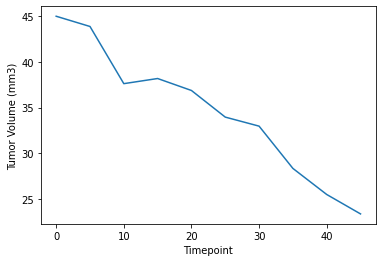

In [57]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_data = compulin_data.loc[compulin_data['Mouse ID']== 's185']
plt.plot(s185_data['Timepoint'],s185_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


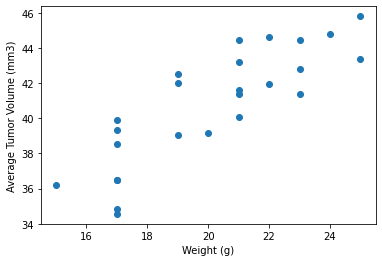

In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumor_average = capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(tumor_average['Weight (g)'],tumor_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and tumor volume is 0.84.


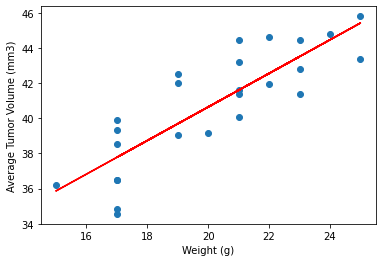

In [71]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
tumor_average = capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(tumor_average['Weight (g)'],tumor_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Find correlation between mouse weight and tumor volume
weight_avg_correlation = round(st.pearsonr(tumor_average['Weight (g)'],tumor_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and tumor volume is {weight_avg_correlation}.")

# Equation for regression and line of best fit 
linegress = st.linregress(tumor_average['Weight (g)'],tumor_average['Tumor Volume (mm3)'])
y_values = tumor_average['Weight (g)']*linegress[0]+linegress[1]
plt.plot(tumor_average['Weight (g)'], y_values, color = 'red')

